<hr>

## TABLE OF CONTENTS

1. [Packages](##1.-PACKAGES)

2. [Datasets](##2.-DATASETS)

3. [Analysis & Visualization](##3.-ANALYSIS-&-VISUALIZATION)

4. [Preprocessing & Pipeline](##4.-PREPROCESSING-&-PIPELINE)

5. [Model Prediction & Evaluation](##5.-MODEL-PREDICTION-&-EVALUATION)

6. [Model Comparison](##6.-MODEL-COMPARISON)

7. [Conclusion](##7.-CONCLUSION)

<hr>

## 1. PACKAGES

### Essential Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Machine Learning Libraries

In [78]:
# data pipeline:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# preprocessing:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# model selection:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# models:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# metrics:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

<hr>

## 2. DATASETS

### Read CSV Files

* **Source: https://www.kaggle.com/datasets/uciml/biomechanical-features-of-orthopedic-patients**

In [79]:
df_2C = pd.read_csv('datasets/orthopedic_2C.csv')
df_3C = pd.read_csv('datasets/orthopedic_3C.csv')

In [80]:
print(df_2C.shape)
print(df_3C.shape)

(310, 7)
(310, 7)


#### X

* **First 6 columns (biomechanical features) of both DFs should have the same data structure and values**

In [81]:
if df_2C.iloc[:, :6].equals(df_3C.iloc[:, :6]):
    # Display the first 10 rows and 6 columns of df_2c
    display(df_2C.iloc[:10, :6])

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437


#### Y

In [82]:
print(df_2C['class'].unique())
print(df_3C['class'].unique())

['Abnormal' 'Normal']
['Hernia' 'Spondylolisthesis' 'Normal']


<hr>

## 3. ANALYSIS & VISUALIZATION

### Class Distribution

#### df_2C

In [83]:
distribution_2C = pd.DataFrame({
    'Class': df_2C['class'].value_counts().index,
    'Count': df_2C['class'].value_counts().values,
    'Percentage (%)': round(df_2C['class'].value_counts(normalize=True)*100,2)
}).reindex(['Normal', 'Abnormal'])

distribution_2C = distribution_2C.reset_index(drop=True)

display(distribution_2C.style.hide(axis="index"))

Class,Count,Percentage (%)
Normal,100,32.260000
Abnormal,210,67.740000


#### df_3C

In [84]:
distribution_3C = pd.DataFrame({
    'Class': df_3C['class'].value_counts().index,
    'Count': df_3C['class'].value_counts().values,
    'Percentage (%)': round(df_3C['class'].value_counts(normalize=True)*100,2)
}).reindex(['Normal', 'Hernia', 'Spondylolisthesis'])

distribution_3C = distribution_3C.reset_index(drop=True)

display(distribution_3C.style.hide(axis="index"))

Class,Count,Percentage (%)
Normal,100,32.260000
Hernia,60,19.350000
Spondylolisthesis,150,48.390000


### Data Cleaning

#### Missing Values

In [85]:
display(df_2C.isnull().sum())
display(df_3C.isnull().sum())

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [86]:
display(df_2C.duplicated().sum())
display(df_3C.duplicated().sum())

np.int64(0)

np.int64(0)

### Statistics

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


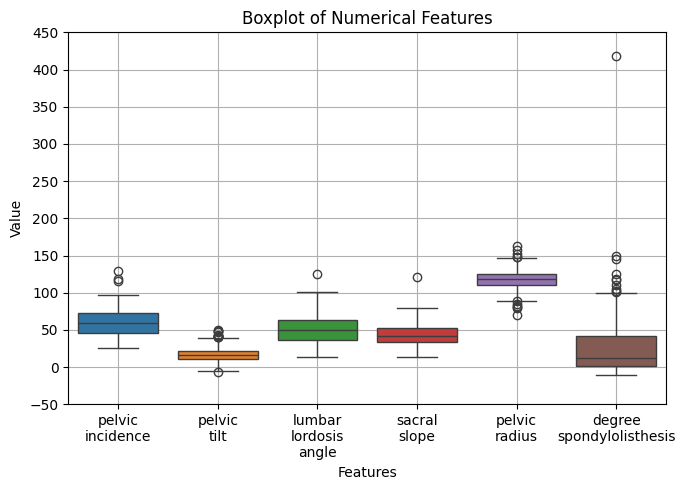

In [87]:
display(df_2C.describe())

plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=df_2C)
plt.title("Boxplot of Numerical Features")

plt.xlabel("Features")
original_labels = df_2C.columns[:6]
wrapped_labels = [label.replace('_', '\n') for label in original_labels]
ax.set_xticks(range(len(wrapped_labels)))
ax.set_xticklabels(wrapped_labels)

plt.ylabel("Value")
plt.yticks(range(-50, 451, 50))

plt.grid(True)
plt.tight_layout()
plt.show()

<hr>

## 4. PREPROCESSING & PIPELINE

### Label Encoding

* OneHotEncoder for df_2C's target variable y (with 2 classes)

* LabelEncoder for df_3C's target variable y (with 3 classes)

In [88]:
# Initialize Encoder
oh_encoder = OneHotEncoder(sparse_output=False)
lb_encoder = LabelEncoder()

#### df_2C

In [89]:
# Make a copy to reserve original data
df_2C_encoded = df_2C.copy()

# Apply OneHot encoder to 'class' and transform to an array
encoded_array_2C = oh_encoder.fit_transform(df_2C_encoded[['class']])
# Create a dataframe from the encoded array
encoded_df_2C = pd.DataFrame(encoded_array_2C, columns=oh_encoder.get_feature_names_out(['class']))
# Concatenate the encoded dataframe with the original dataframe
df_2C_encoded = pd.concat([df_2C_encoded, encoded_df_2C], axis=1)
# Drop the original 'class', and 'class_Normal' column
df_2C_encoded.drop(['class','class_Normal'], axis=1, inplace=True)

# Value Counts:
display(df_2C_encoded['class_Abnormal'].value_counts().sort_index(ascending=False))

display(df_2C_encoded.head())

class_Abnormal
1.0    210
0.0    100
Name: count, dtype: int64

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1.0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1.0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1.0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1.0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1.0


#### df_3C

In [90]:
# Make a copy to reserve original data
df_3C_encoded = df_3C.copy()

# Custom classes: 'Normal'=0, 'Hernia'=1, 'Spondylolisthesis'=2
custom_classes = ['Normal', 'Hernia', 'Spondylolisthesis']
# Force custom order
lb_encoder.classes_ = np.array(custom_classes)
# Transform using the custom order
df_3C_encoded['class'] = lb_encoder.transform(df_3C_encoded['class'])

# Value Counts:
display(df_3C_encoded['class'].value_counts().sort_index(ascending=False))

display(df_3C_encoded.head())

class
2    150
1     60
0    100
Name: count, dtype: int64

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


### Feature Scaling

In [91]:
X_1_5_unscaled = df_2C_encoded.iloc[:, :4]
X_6_unscaled = df_2C_encoded.iloc[:, 4:6]

In [92]:
# Initate scaler:
std_scaler = StandardScaler()
rb_scaler = RobustScaler()

In [93]:
numerical_cols_1_5 = X_1_5_unscaled.columns.tolist()
numerical_cols_6 = X_6_unscaled.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num1', std_scaler, numerical_cols_1_5), 
        ('num2', rb_scaler, numerical_cols_6)
    ],
    remainder='passthrough'
)

### Models & Pipelines

**Notes: Tree based model doesn't need scaling**

#### Models
- RandomForest Model
    - df_2C
    - df_3C
- DecisionTree Model
    - df_2C
    - df_3C
#### Pipelines
- Naive Bayes Model
    - df_2C
    - df_3C

In [94]:
# Classifying objects:
rf_classifier = RandomForestClassifier(random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
nb_classifier = GaussianNB()

##### RandomForest model pipeline for df_2C

In [95]:
rf_model_2C = clone(rf_classifier)

##### RandomForest model pipeline for df_3C

In [96]:
rf_model_3C = clone(rf_classifier)

##### DecisionTree model pipeline for df_2C

In [97]:
dt_model_2C = clone(dt_classifier)

##### DecisionTree model pipeline for df_3C

In [98]:
dt_model_3C = clone(dt_classifier)

##### Naive Bayes model pipeline for df_2C

In [99]:
nb_pipeline_2C = Pipeline([
    #('preprocessor', preprocessor), 
    ('classifier', clone(nb_classifier))
])

##### Naive Bayes model pipeline for df_3C

In [100]:
nb_pipeline_3C = Pipeline([
    ('classifier', clone(nb_classifier))
])

### Splitting

In [101]:
X_unscaled = df_2C_encoded.iloc[:, :6]
y_2C = df_2C_encoded['class_Abnormal']
y_3C = df_3C_encoded['class']

X_train_2C, X_test_2C, y_train_2C, y_test_2C = train_test_split(X_unscaled, y_2C, test_size=0.2, random_state=28, stratify=y_2C)
print(X_train_2C.shape, y_train_2C.shape, X_test_2C.shape, y_test_2C.shape)

X_train_3C, X_test_3C, y_train_3C, y_test_3C = train_test_split(X_unscaled, y_3C, test_size=0.2, random_state=82, stratify=y_3C)
print(X_train_3C.shape, y_train_3C.shape, X_test_3C.shape, y_test_3C.shape)

(248, 6) (248,) (62, 6) (62,)
(248, 6) (248,) (62, 6) (62,)


<hr>

## 5. MODEL PREDICTION & EVALUATION

### RandomForest Model

#### df_2C

In [102]:
scores = cross_val_score(rf_model_2C, X_unscaled, y_2C, cv=5, scoring='f1')  # or 'accuracy'

print("Cross-Validation F1 Scores:", scores)
print("Average F1 Score:", scores.mean())

Cross-Validation F1 Scores: [0.52459016 0.84705882 0.90909091 0.98823529 0.89361702]
Average F1 Score: 0.832518442389798


In [103]:
rf_model_2C.fit(X_train_2C, y_train_2C)
y_pred_rf_2C = rf_model_2C.predict(X_test_2C)
accuracy_score(y_test_2C, y_pred_rf_2C)

0.8064516129032258

#### df_3C

In [104]:
rf_model_3C.fit(X_train_3C, y_train_3C)
y_pred_rf_3C = rf_model_3C.predict(X_test_3C)
accuracy_score(y_test_3C, y_pred_rf_3C)

0.8225806451612904

### DecisionTree Model

#### df_2C

In [105]:
dt_model_2C.fit(X_train_2C, y_train_2C)
y_pred_dt_2C = dt_model_2C.predict(X_test_2C)
accuracy_score(y_test_2C, y_pred_dt_2C)

0.7419354838709677

#### df_3C

In [106]:
dt_model_3C.fit(X_train_3C, y_train_3C)
y_pred_dt_3C = dt_model_3C.predict(X_test_3C)
accuracy_score(y_test_3C, y_pred_dt_3C)

0.7258064516129032

### Gaussian Naive Bayes Model

#### df_2C

In [107]:
nb_pipeline_2C.fit(X_train_2C, y_train_2C)
y_pred_nb_2C = nb_pipeline_2C.predict(X_test_2C)
accuracy_score(y_test_2C, y_pred_nb_2C)

0.7258064516129032

#### df_3C

In [108]:
nb_pipeline_3C.fit(X_train_3C, y_train_3C)
y_pred_nb_3C = nb_pipeline_3C.predict(X_test_3C)
accuracy_score(y_test_3C, y_pred_nb_3C)

0.8870967741935484

<hr>

## 6. MODEL COMPARISON

### df_2C

In [109]:
print("\ndf_2C")
for model, y_pred, y_test in zip(
    ['RandomForest', 'DecisionTree', 'NaiveBayes'],
    [y_pred_rf_2C, y_pred_dt_2C, y_pred_nb_2C],
    [y_test_2C, y_test_2C, y_test_2C]
):
    print(f"{model} - Accuracy: {accuracy_score(y_test, y_pred):.4f}, "
          f"Precision: {precision_score(y_test, y_pred):.4f}, "
          f"Recall: {recall_score(y_test, y_pred):.4f}, "
          f"F1 Score: {f1_score(y_test, y_pred):.4f}")


df_2C
RandomForest - Accuracy: 0.8065, Precision: 0.8409, Recall: 0.8810, F1 Score: 0.8605
DecisionTree - Accuracy: 0.7419, Precision: 0.8095, Recall: 0.8095, F1 Score: 0.8095
NaiveBayes - Accuracy: 0.7258, Precision: 0.8571, Recall: 0.7143, F1 Score: 0.7792


In [110]:
for model, y_pred, y_test in zip(
    ['RandomForest', 'DecisionTree', 'NaiveBayes'],
    [y_pred_rf_2C, y_pred_dt_2C, y_pred_nb_2C],
    [y_test_2C, y_test_2C, y_test_2C]
):
    print(f"{model}\n{classification_report(y_test, y_pred)}")

RandomForest
              precision    recall  f1-score   support

         0.0       0.72      0.65      0.68        20
         1.0       0.84      0.88      0.86        42

    accuracy                           0.81        62
   macro avg       0.78      0.77      0.77        62
weighted avg       0.80      0.81      0.80        62

DecisionTree
              precision    recall  f1-score   support

         0.0       0.60      0.60      0.60        20
         1.0       0.81      0.81      0.81        42

    accuracy                           0.74        62
   macro avg       0.70      0.70      0.70        62
weighted avg       0.74      0.74      0.74        62

NaiveBayes
              precision    recall  f1-score   support

         0.0       0.56      0.75      0.64        20
         1.0       0.86      0.71      0.78        42

    accuracy                           0.73        62
   macro avg       0.71      0.73      0.71        62
weighted avg       0.76      0.73    

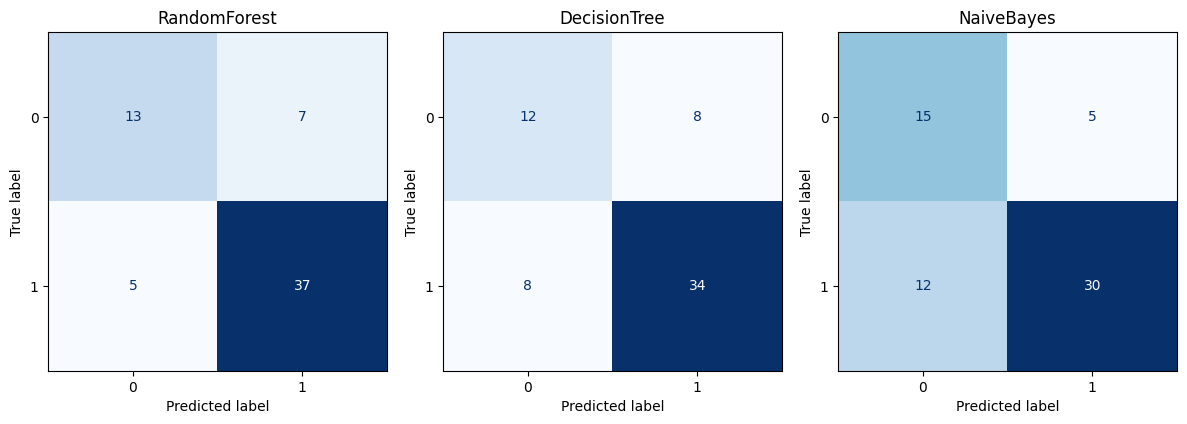

In [111]:
models = ['RandomForest', 'DecisionTree', 'NaiveBayes']
preds = [y_pred_rf_2C, y_pred_dt_2C, y_pred_nb_2C]
tests = [y_test_2C, y_test_2C, y_test_2C]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns
for ax, model, y_pred, y_test in zip(axs, models, preds, tests):
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)
    ax.set_title(model)
    ax.grid(False)
plt.tight_layout()
plt.show()
    

### df_3C

In [112]:
print("\ndf_3C")
for model, y_pred, y_test in zip(
    ['RandomForest', 'DecisionTree', 'NaiveBayes'],
    [y_pred_rf_3C, y_pred_dt_3C, y_pred_nb_3C],
    [y_test_3C, y_test_3C, y_test_3C]
):
    print(f"{model} - Accuracy: {accuracy_score(y_test, y_pred):.4f}, "
          f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}, "
          f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}, "
          f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")


df_3C
RandomForest - Accuracy: 0.8226, Precision: 0.8213, Recall: 0.8226, F1 Score: 0.8216
DecisionTree - Accuracy: 0.7258, Precision: 0.7609, Recall: 0.7258, F1 Score: 0.7391
NaiveBayes - Accuracy: 0.8871, Precision: 0.8836, Recall: 0.8871, F1 Score: 0.8844


In [113]:
for model, y_pred, y_test in zip(
    ['RandomForest', 'DecisionTree', 'NaiveBayes'],
    [y_pred_rf_3C, y_pred_dt_3C, y_pred_nb_3C],
    [y_test_3C, y_test_3C, y_test_3C]
):
    print(f"{model}\n{classification_report(y_test, y_pred)}")

RandomForest
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.64      0.58      0.61        12
           2       0.97      0.97      0.97        30

    accuracy                           0.82        62
   macro avg       0.77      0.77      0.77        62
weighted avg       0.82      0.82      0.82        62

DecisionTree
              precision    recall  f1-score   support

           0       0.65      0.55      0.59        20
           1       0.35      0.50      0.41        12
           2       1.00      0.93      0.97        30

    accuracy                           0.73        62
   macro avg       0.67      0.66      0.66        62
weighted avg       0.76      0.73      0.74        62

NaiveBayes
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.82      0.75      0.78        12
           2       0.94      1.00     

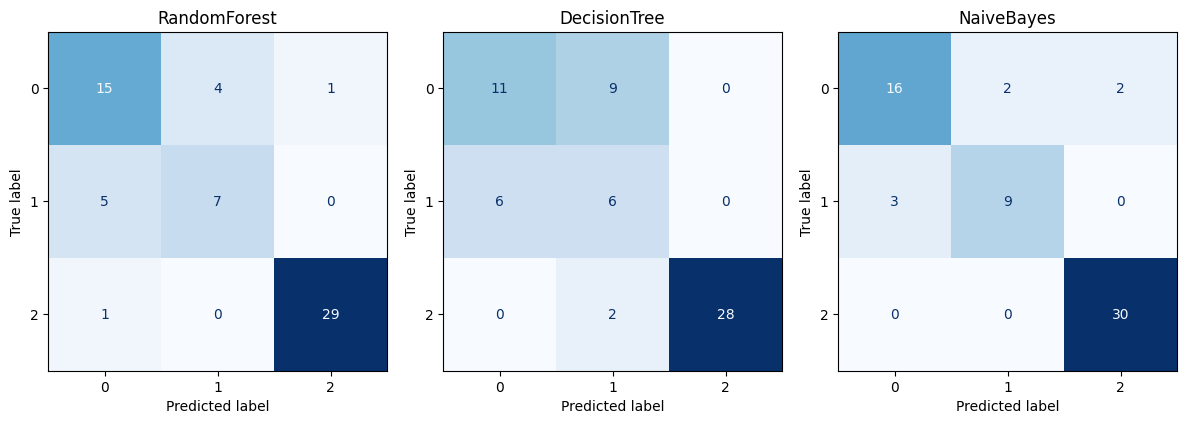

In [114]:
preds_3C = [y_pred_rf_3C, y_pred_dt_3C, y_pred_nb_3C]
tests_3C = [y_test_3C, y_test_3C, y_test_3C]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns
for ax, model, y_pred, y_test in zip(axs, models, preds_3C, tests_3C):
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)
    ax.set_title(model)
    ax.grid(False)
plt.tight_layout()
plt.show()

<hr>

## 7. CONCLUSION

For the binary (0/1) classification task (df_2C), Random Forest outperformed other models with an accuracy of 80.65%, precision of 84.09%, recall of 88.10%, and an F1 score of 86.05%, making it the most effective at distinguishing between normal and abnormal cases.

In the multiclass classification task (df_3C), Naïve Bayes achieved the best performance with an accuracy of 88.71%, precision of 88.36%, recall of 88.71%, and an F1 score of 88.44%, indicating strong and balanced classification across all three classes: normal, hernia, and spondylolisthesis.
